In [293]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats.stats import pearsonr
%config InlineBackend.figure_format = 'retina'

color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))  #only contain 3 dicimals


Import the data and start the data preprocessing

In [294]:
train = pd.read_csv('./Downloads/housePriceData/trainset.csv')
test = pd.read_csv('./Downloads/housePriceData/testset1.csv')

from sklearn.utils import shuffle

train = shuffle(train,random_state=42).reset_index() 
test = shuffle(test,random_state=42).reset_index() 
del train['index']
del test['index']
print("Train shape: ", train.shape)
print("Test shape: ", test.shape)

train.head(5)
test.head(5)

Train shape:  (1460, 81)
Test shape:  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2782,20,RM,60.000,7200,Pave,Grvl,Reg,Lvl,AllPub,...,115,0,NaN,NaN,NaN,0,8,2006,COD,Normal
1,2297,60,RL,82.000,9709,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2007,New,Partial
2,1874,20,RL,65.000,9757,Pave,NaN,Reg,Low,AllPub,...,92,0,NaN,NaN,NaN,0,10,2009,WD,Normal
3,1983,120,RL,48.000,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
4,2496,20,RL,102.000,12671,Pave,NaN,IR1,Lvl,AllPub,...,144,0,NaN,NaN,NaN,0,7,2007,WD,Normal


Removing the useful feature "ID" and separate it from the original data

In [295]:
print("Feature with ID in trainset : {} ".format(train.shape))
print("Feature with ID in testset : {} ".format(test.shape))

trainset_ID = train['Id']
testset_ID = train['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

Feature with ID in trainset : (1460, 81) 
Feature with ID in testset : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


Simpliest way to delete the outliers

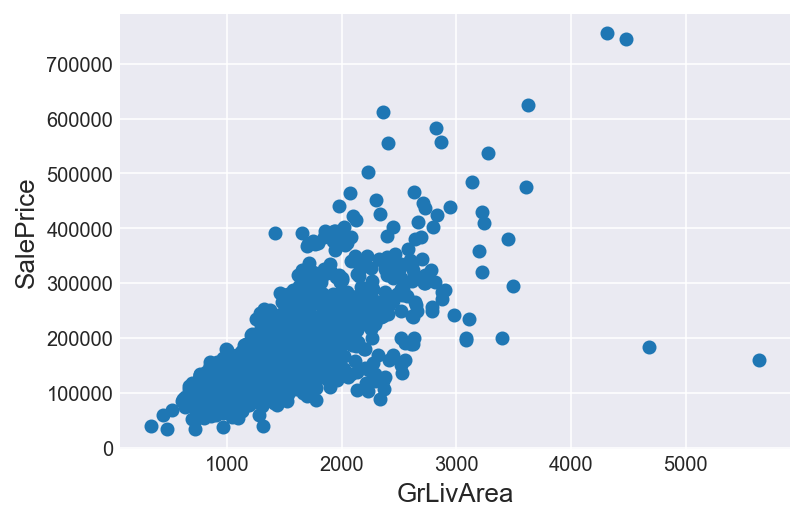

In [296]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# We can see at the bottom right with two extremely large GrLivArea that are of a low price . These  values  are huge outliers. So, we should delete it 
# them

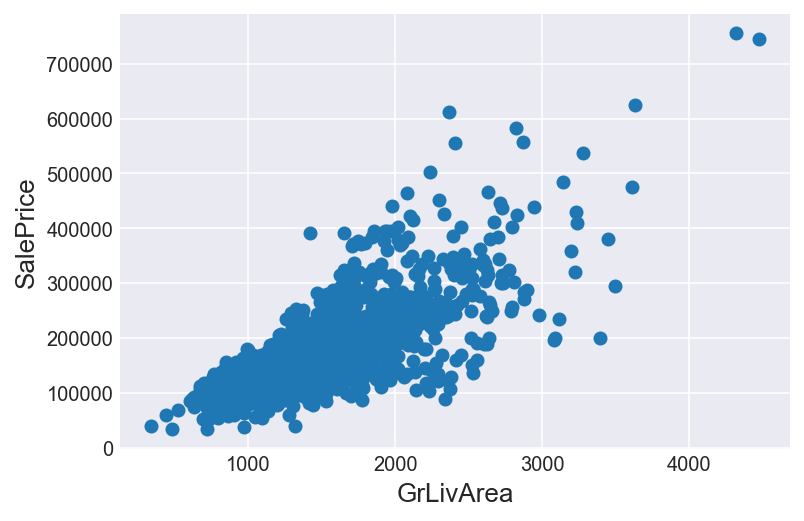

In [297]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Check if the 'SalePrice' normal distributed and fit it more normal dirtributed if not

<input>:6: DeprecationWarning: invalid escape sequence \m
<input>:6: DeprecationWarning: invalid escape sequence \m
<input>:6: DeprecationWarning: invalid escape sequence \m
<ipython-input-298-f63d0bfa72dd>:6: DeprecationWarning: invalid escape sequence \m
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],


 
 mu = 180932.92 and sigma =  79467.79



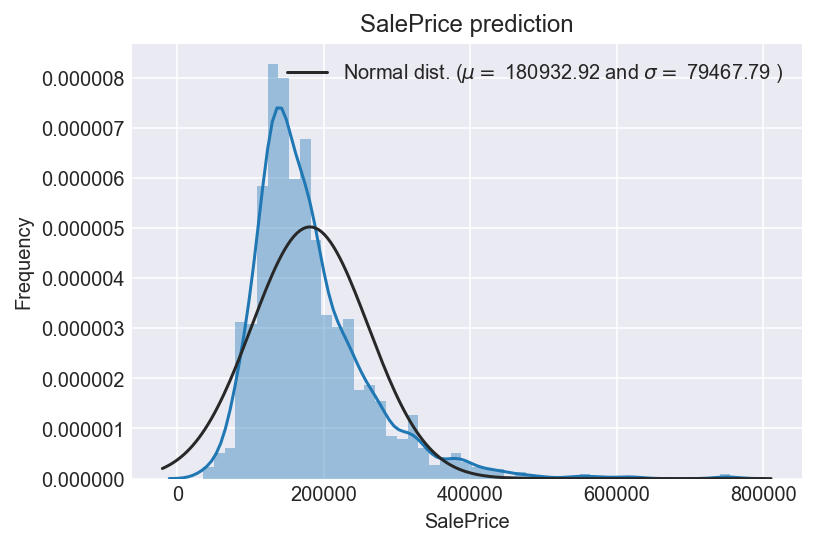

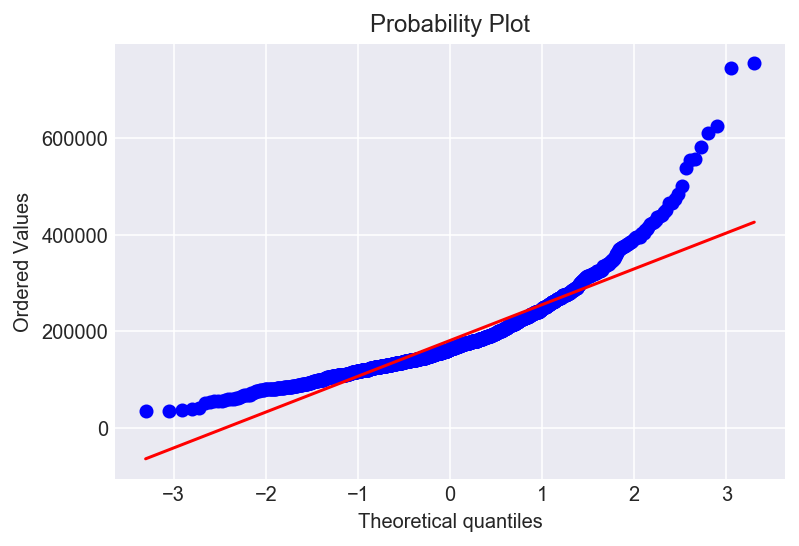

In [298]:
sns.distplot(train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print(' \n mu = {:.2f} and sigma =  {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice prediction')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)
plt.show()
#The QQ plot shows that This is not a completely normal distribution, We need to transform it to normal distribution


 mu = 12.02 and sigma = 0.40



<input>:9: DeprecationWarning: invalid escape sequence \m
<input>:9: DeprecationWarning: invalid escape sequence \m
<input>:9: DeprecationWarning: invalid escape sequence \m
<ipython-input-299-b77f3ba80613>:9: DeprecationWarning: invalid escape sequence \m
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],


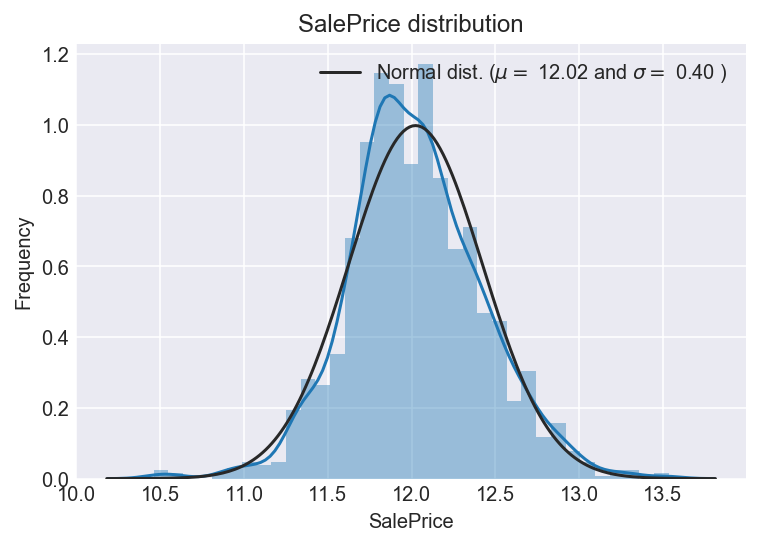

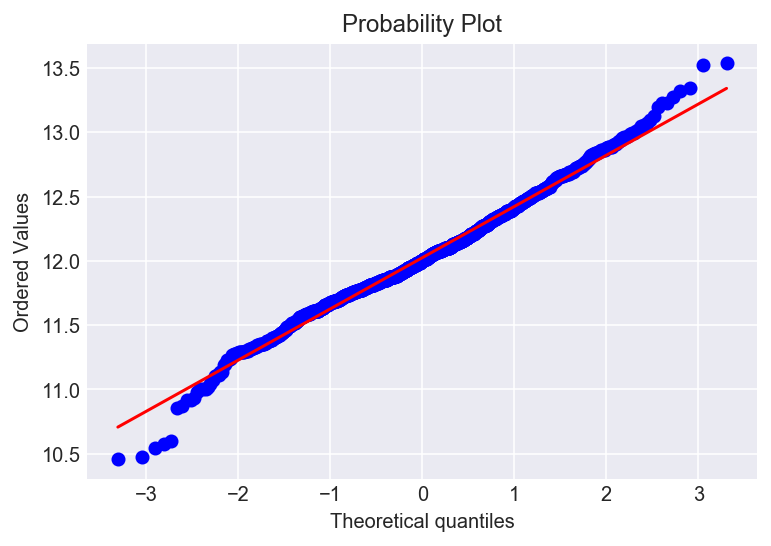

In [299]:
# Scaling the data by applying log(1+x) to all the prediction
train['SalePrice'] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [300]:
# First Concatenate the train and test data in the same dataframe
ntrain = train.shape[0]
ntest = train.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


Check and plot the missing ratio of each feature 

In [301]:
# In this part we need treat the missing value
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
ratio = all_data_na
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30] # In Decending order
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(10)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


Text(0.5,1,'Percent missing data by feature')

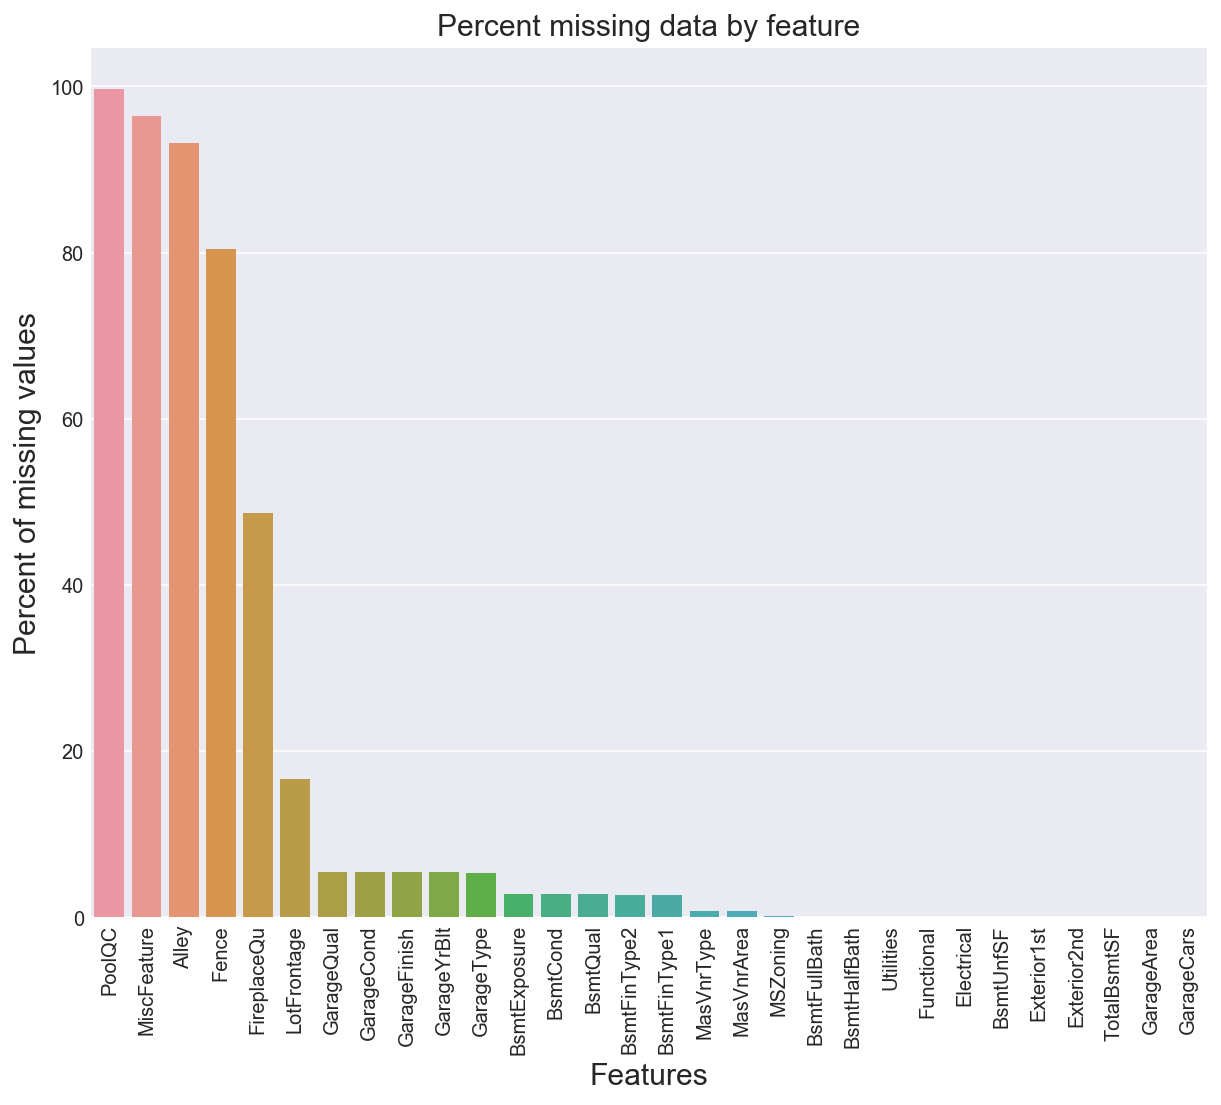

In [302]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90') #(ratate the name of each column in of each predictor)
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

find the correlation between each features

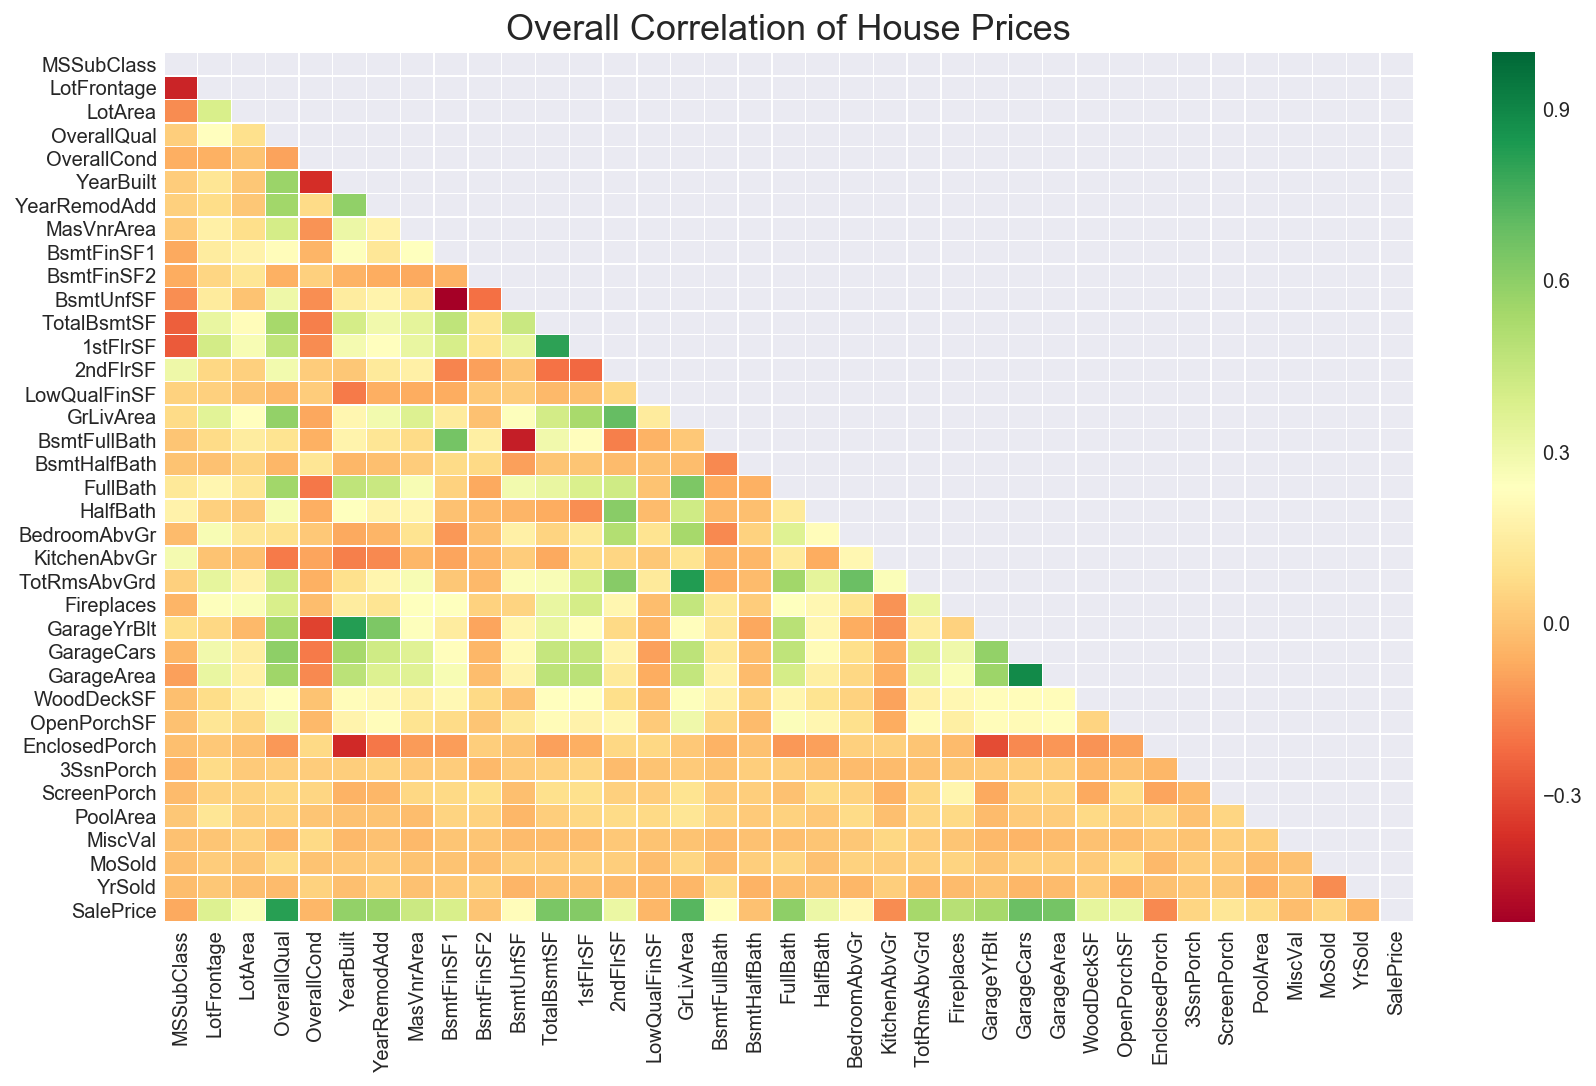

In [303]:
# Initiate correlation matrix
corr = train.corr()
# Set-up mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set-up figure
plt.figure(figsize=(14, 8))
# Title
plt.title('Overall Correlation of House Prices', fontsize=18)
# Correlation matrix
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

Replacing missing value

In [304]:
# Version 1, Treating all the missing value by using the most simple way
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
   
# Since No garage = no cars in such garage
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)

all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


LabelEncoder the catagorical features

In [305]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [306]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BldgType',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope','Exterior2nd','Electrical','Condition2','Condition1',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'HouseStyle','Heating','GarageType','Foundation','Exterior1st',
        'YrSold', 'MoSold','SaleType','SaleCondition','RoofStyle','RoofMatl','Neighborhood','MiscFeature','MasVnrType','MSZoning','LotConfig','LandContour')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


Adding new import features in the dataset

In [307]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Apply box-cox transformation is need

In [308]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
Condition2,12.341
LowQualFinSF,12.085
Heating,12.075
3SsnPorch,11.372
RoofMatl,8.723
MiscFeature,5.062
LandSlope,4.973


In [309]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 79 skewed numerical features to Box Cox transform


In [310]:
#version2, train_1 and test_1 Dropping the predictors with missing ratio greater than 90 percent 
all_data_1 = all_data.drop('PoolQC', axis=1, inplace = False)

print("training set version two :{}".format(all_data_1.shape))
#version3, train_2 and test_2 Dropping the predictors with missing ratio greater than 70 percent 
all_data_2 = all_data.drop('Alley',axis=1,inplace=False).drop('Fence',axis=1,inplace=False).drop('MiscFeature',axis=1,inplace=False)
print("training set version two :{}".format(all_data_2.shape))

training set version two :(2917, 78)
training set version two :(2917, 76)


Setting dummies for catagorical features

In [312]:
#Getting dummy categorial features

all_data_1 = pd.get_dummies(all_data_1)
print(all_data_1.shape)
all_data_2 = pd.get_dummies(all_data_2)
print(all_data_2.shape)


(2917, 78)
(2917, 76)


In [315]:
#Version 1.1
train_0 = all_data[:ntrain]
test_0 = all_data[ntrain:]
print(train_0.shape)
#Version 1.2
train_1 = all_data_1[:ntrain]
test_1 = all_data_1[ntrain:]
print(train_1.shape)
#Version 1.3
train_2 = all_data_2[:ntrain]
test_2 = all_data_2[ntrain:]
print(train_2.shape)

(1458, 79)
(1458, 78)
(1458, 76)


In [316]:
#output the transformed input
sub = pd.DataFrame()
train_0['SalePrice'] = y_train
sub = train_0
sub.to_csv("train001.csv",index = False)

sub = pd.DataFrame()
sub = test_0
sub.to_csv("test00.csv",index = False)

sub = pd.DataFrame()
train_2['SalePrice'] = y_train
sub = train_2
sub.to_csv("version2_train.csv",index = False)

sub = pd.DataFrame()
sub = test_2
sub.to_csv("version2_test.csv",index = False)

In this step, we try to do data preprocessing in advanced way with package fancyimpute

In this part, we do advanced imputation : linear regression imputation and knn imputation

In [317]:
Train = pd.read_csv('./Downloads/housePriceData/trainset.csv')
Test = pd.read_csv('./Downloads/housePriceData/testset1.csv')

In [318]:
Train = shuffle(Train,random_state=42).reset_index() 
Test = shuffle(Test,random_state=42).reset_index() 
del Train['index']
del Test['index']
del Train['Id']
del Test['Id']
print("Train shape: ", Train.shape)
print("Test shape: ", Test.shape)
Train.head()

Train shape:  (1460, 80)
Test shape:  (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,70.000,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1,60,RL,98.000,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
2,30,RM,56.000,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
3,50,RM,50.000,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
4,20,RL,89.000,12898,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500



 mu = 12.02 and sigma = 0.40



<input>:12: DeprecationWarning: invalid escape sequence \m
<input>:12: DeprecationWarning: invalid escape sequence \m
<input>:12: DeprecationWarning: invalid escape sequence \m
<ipython-input-319-c7ba16b4bb64>:12: DeprecationWarning: invalid escape sequence \m
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],


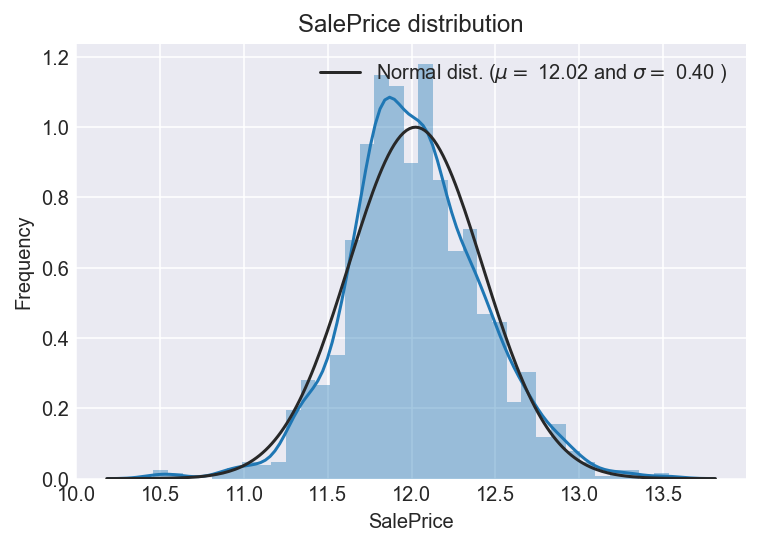

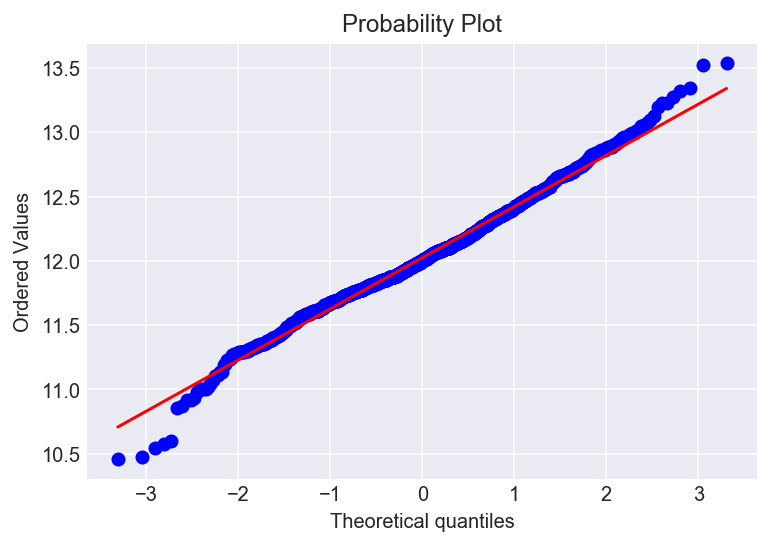

In [319]:
#also we need to make our data normal distribution
Train["SalePrice"] = np.log1p(Train["SalePrice"])

#Check the new distribution 
sns.distplot(Train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(Train['SalePrice'], plot=plt)
plt.show()

In [320]:
ntrain = Train.shape[0]
ntest = Test.shape[0]
y_train1 = Train.SalePrice.values
all_data = pd.concat((Train, Test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


In [321]:
#also we need to make our data normal distribution
print(y_train1)

[11.94795585 12.69158354 11.6526961  ... 11.6526961  12.15452142
 12.06681633]


In [322]:
ftype = {'cat':[],'quant':[]}
for col in Train:
    nuq = Train[col].nunique() #print(col,":",nuq)
    if nuq < 20:
        ftype['cat'].append(col)
    else:
        ftype['quant'].append(col) 
print('Categorical Featrues: \n',ftype['cat'])
print('\nQuantitative Featrues: \n',ftype['quant'])

ftype['quant'].remove('YearBuilt')
ftype['quant'].remove('YearRemodAdd')
ftype['quant'].remove('Neighborhood')
ftype['cat'].append('YearBuilt')
ftype['cat'].append('YearRemodAdd')
ftype['cat'].append('Neighborhood')
print(len(ftype['cat']))
print(len(ftype['quant']))

Categorical Featrues: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

Quantitative Featrues: 
 ['LotFrontage', 'LotArea', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinS

# For regression or KNN, it become terrible when the missing data ratio is greater than 50 %

In [323]:
# Deleting the feature when missing data's ratio is greater than 50 %
for c in ( "Fence", "MiscFeature", "Alley", "PoolQC"):
    all_data.drop(c,axis=1,inplace=True)
    ftype['cat'].remove(c)

In [324]:
print(ftype['cat'])

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'YearBuilt', 'YearRemodAdd', 'Neighborhood']


Label Encoder the data by keeping the null in the dataset

In [325]:
#  We need to ignore new labels(Encoder)
from sklearn.utils.validation import check_is_fitted, column_or_1d

class TolerantLabelEncoder(LabelEncoder):
    def __init__(self, ignore_unknown=False,
                       unknown_original_value='unknown', 
                       unknown_encoded_value=-1):
        self.ignore_unknown = ignore_unknown
        self.unknown_original_value = unknown_original_value
        self.unknown_encoded_value = unknown_encoded_value

    def transform(self, y):
        check_is_fitted(self, 'classes_')
        y = column_or_1d(y, warn=True)

        indices = np.isin(y, self.classes_)
        if not self.ignore_unknown and not np.all(indices):
            raise ValueError("y contains new labels: %s" 
                                         % str(np.setdiff1d(y, self.classes_)))

        y_transformed = np.searchsorted(self.classes_, y)
        y_transformed[~indices]=self.unknown_encoded_value
        return y_transformed

    def inverse_transform(self, y):
        check_is_fitted(self, 'classes_')

        labels = np.arange(len(self.classes_))
        indices = np.isin(y, labels)
        if not self.ignore_unknown and not np.all(indices):
            raise ValueError("y contains new labels: %s" 
                                         % str(np.setdiff1d(y, self.classes_)))

        y_transformed = np.asarray(self.classes_[y], dtype=object)
        y_transformed[~indices]=self.unknown_original_value
        return y_transformed

from numpy import NaN
cols = ftype['cat']
for c in cols:
    df = all_data[c].copy()
    df = df.to_frame() #ZXP

    lbl = TolerantLabelEncoder(ignore_unknown=True) 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
    df_1 = all_data[c]
    
    # ZXP
    for i in range(df.shape[0]):
        if (pd.isnull(df[c].loc[i])):
            df_1.loc[i] = df[c].loc[i]
    # ZXP
    
    all_data[c] = df_1
    
print('Shape all_data: {}'.format(all_data.shape))
all_data_knn = all_data

Shape all_data: (2919, 75)


In [326]:
all_data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 75 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null int64
BsmtCond         2837 non-null float64
BsmtExposure     2837 non-null float64
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null float64
BsmtFinType2     2839 non-null float64
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null float64
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null int64
Condition1       2919 non-null int64
Condition2       2919 non-null int64
Electrical       2918 non-null float64
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null int64
ExterQual        2919 non-null int64
Exterior1st      2918 non-null float64
Exterior2nd      2

In [327]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
ratio = all_data_na
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30] # In Decending order
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
FireplaceQu,48.647
LotFrontage,16.650
GarageCond,5.447
GarageFinish,5.447
GarageQual,5.447


In [328]:
mtype = {'mis':[],'com':[]}
for col in all_data:
    size_null = all_data[col].isnull().sum()
    if size_null >0:
        mtype['mis'].append(col)
    else:
        mtype['com'].append(col)
print('Have null: \n',mtype['mis'])
print('\n No null : \n',mtype['com'])
all_data.info()

Have null: 
 ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'SaleType', 'TotalBsmtSF', 'Utilities']

 No null : 
 ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType', 'CentralAir', 'Condition1', 'Condition2', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fireplaces', 'Foundation', 'FullBath', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'ScreenPorch', 'Street', 'Tot

Apply linear regression imputation

In [329]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
for c in mtype['mis']:
    mtype['com'].append(c)
    data = all_data[mtype['com']]
    
    x_train = data[data[c].notnull()].drop(columns=c)
    y_train = data[data[c].notnull()][c]
    x_test = data[:].drop(columns=c)
    y_test = data[data[c].isnull()][c]
    linreg.fit(x_train, y_train)
    predicted = linreg.predict(x_test)
    for i in range(2919):
         if (pd.isnull(all_data[c].loc[i])):
                all_data[c].iloc[i] = predicted[i]

In [330]:
#trainsform the input (from linear regression) by applying boxcox1p
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.20
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)


Skew in numerical features: 

There are 75 skewed numerical features to Box Cox transform


In [331]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
print(all_data.shape)


(2919, 76)


adding dummies

In [332]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 76)


In [333]:
train_reg = all_data[:ntrain]
test_reg = all_data[ntrain:]

In [334]:

sub = pd.DataFrame()
train_reg['SalePrice'] = y_train1
sub = train_reg
sub.to_csv("linearregression_train.csv",index = False)

sub_1 = pd.DataFrame()
sub_1 = test_reg
sub_1.to_csv("linearregression_test.csv",index = False)

apply KNN imputation by using package of fancyimpute

In [335]:
#Using Knn replace the missing value
from fancyimpute import KNN 
train_cols = list(all_data_knn)
all_data_knn = pd.DataFrame(KNN(k=5).fit_transform(all_data_knn))
all_data_knn.columns = train_cols

Imputing row 1/2919 with 0 missing, elapsed time: 2.750
Imputing row 101/2919 with 0 missing, elapsed time: 2.750
Imputing row 201/2919 with 0 missing, elapsed time: 2.751
Imputing row 301/2919 with 0 missing, elapsed time: 2.751
Imputing row 401/2919 with 0 missing, elapsed time: 2.751
Imputing row 501/2919 with 0 missing, elapsed time: 2.751
Imputing row 601/2919 with 0 missing, elapsed time: 2.752
Imputing row 701/2919 with 0 missing, elapsed time: 2.752
Imputing row 801/2919 with 0 missing, elapsed time: 2.752
Imputing row 901/2919 with 0 missing, elapsed time: 2.752
Imputing row 1001/2919 with 0 missing, elapsed time: 2.753
Imputing row 1101/2919 with 0 missing, elapsed time: 2.753
Imputing row 1201/2919 with 0 missing, elapsed time: 2.753
Imputing row 1301/2919 with 0 missing, elapsed time: 2.753
Imputing row 1401/2919 with 0 missing, elapsed time: 2.754
Imputing row 1501/2919 with 0 missing, elapsed time: 2.754
Imputing row 1601/2919 with 0 missing, elapsed time: 2.754
Imputing 

In [336]:
#trainsform the input (from knn) by applying boxcox1p

numeric_feats = all_data_knn.dtypes[all_data_knn.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data_knn[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.20
for feat in skewed_features:
    #all_data[feat] += 1
    all_data_knn[feat] = boxcox1p(all_data_knn[feat], lam)
    
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
print(all_data.shape)

all_data = pd.get_dummies(all_data)
print(all_data.shape)

d =[]
for i in range ( 213 - 76 ) :
    d.append(i)
for c in d :
    all_data[c] = 0
print(all_data.shape)

train_kreg = all_data[:ntrain]
test_kreg = all_data[ntrain:]


Skew in numerical features: 

There are 76 skewed numerical features to Box Cox transform
(2919, 76)
(2919, 76)
(2919, 213)


output the dataset

In [337]:
sub = pd.DataFrame()
train_kreg['SalePrice'] = y_train1
sub = train_kreg
sub.to_csv("knn_train.csv",index = False)

sub_1 = pd.DataFrame()
sub_1 = test_kreg
sub_1.to_csv("knn_test.csv",index = False)